<a href="https://colab.research.google.com/github/girish-kumar-l/data-analytics/blob/main/Financial_Analysis_of_Indian_Pvt_Bank_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy-financial #this is not available readily in colab

In [2]:
#Financial data analysi of HDFC Bank
#Data Source: Yahoo Finance
#Use Cases: Provide data points on Company's financial health by determining parameters like profitability, liquidity, & solvency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import numpy_financial as npf
import yfinance as yf
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [3]:
class Stock:
    def __init__(self, ticker):
        self.ticker = ticker
    def get_stock(self,ticker):
        stock = yf.Ticker(ticker).history(period="Max")
        return stock

In [4]:
HDFCBANK = Stock("HDFCBANK.NS").get_stock("HDFCBANK.NS")
HDFCBANK.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-28 00:00:00+05:30,1661.500000,1668.900024,1641.099976,1643.500000,20507842,0.0,0.0
2023-07-31 00:00:00+05:30,1650.050049,1656.800049,1638.699951,1651.199951,17282503,0.0,0.0
2023-08-01 00:00:00+05:30,1654.449951,1667.449951,1650.000000,1662.250000,17697094,0.0,0.0
2023-08-02 00:00:00+05:30,1642.000000,1651.500000,1633.150024,1640.500000,14058161,0.0,0.0
2023-08-03 00:00:00+05:30,1640.000000,1651.349976,1623.000000,1628.650024,28836165,0.0,0.0


In [ ]:
x = HDFCBANK.index
y = HDFCBANK.Close

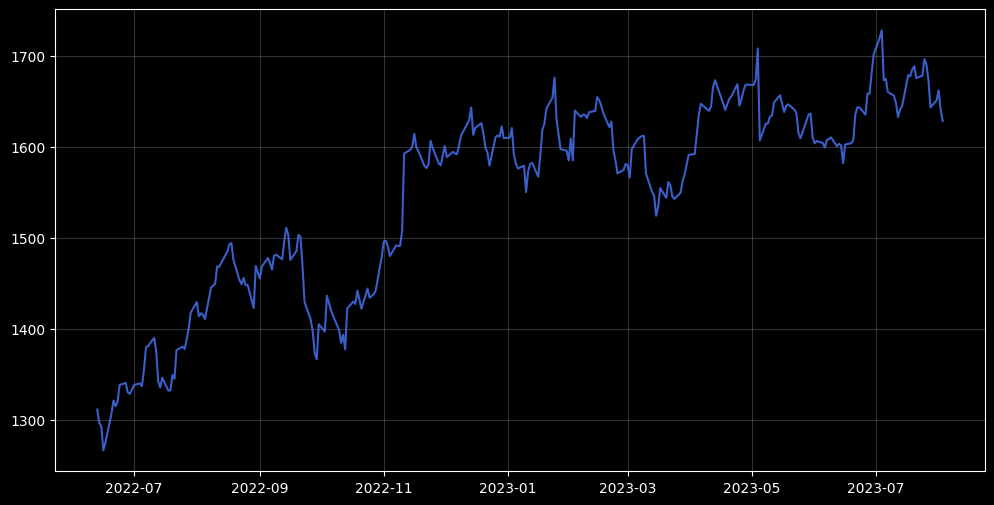

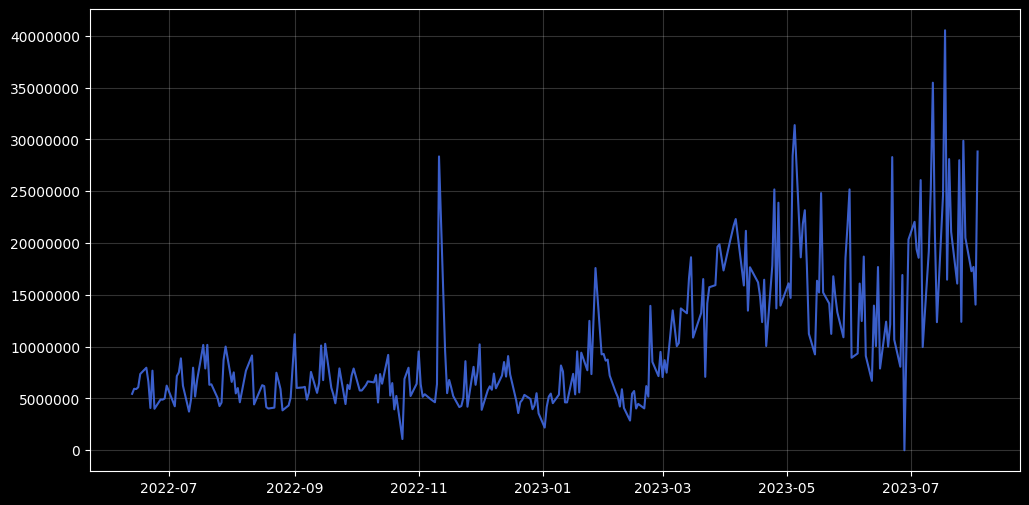

In [7]:
#Plot class will plot graph through taking two argument x and y
#These instance variables represent the data that will be plotted on the line plot.
class Plot:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def line_plot(self, x,y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.plot(x,y, color="royalblue", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()
    def bar_plot(self, x,y):
        from matplotlib.ticker import FuncFormatter
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(12, 6))
        plt.bar(x,y, color="royalblue", alpha=0.9)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        ax.grid(color='white', alpha=0.20)
        plt.show()

my_plot = Plot(x,y).line_plot(x[6654:],y[6654:])
my_plot = Plot(x,y).line_plot(x = HDFCBANK.index[6654:], y = HDFCBANK.Volume[6654:])

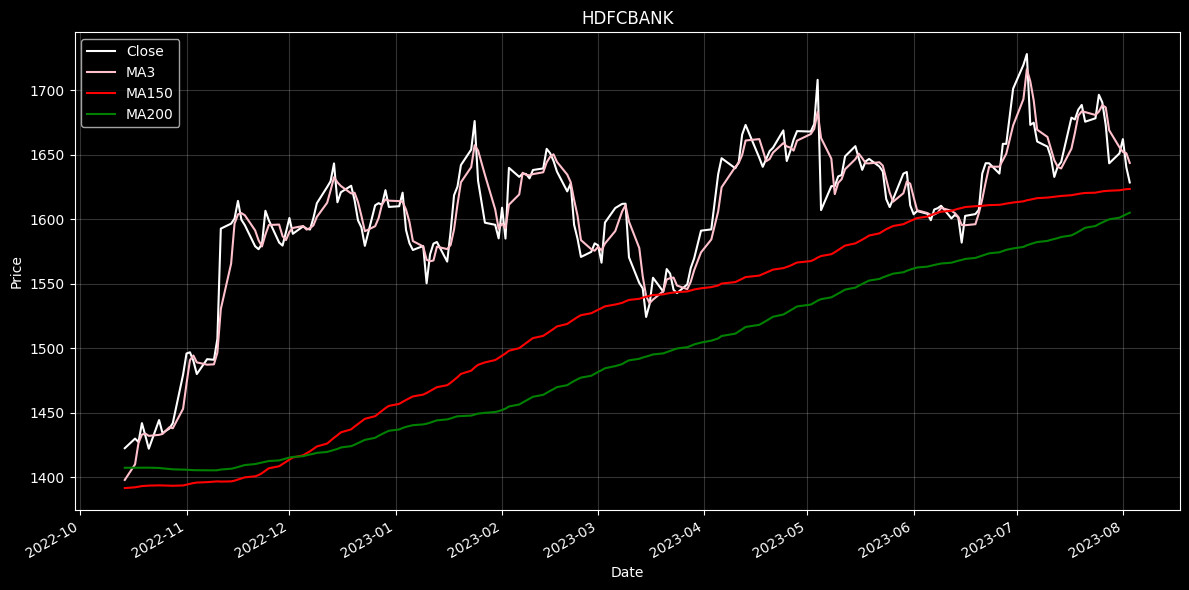

In [8]:
#Moving Average Calculation
class StockMovingAverageShort:
    def __init__(self, ticker):
        self.ticker = ticker
    def moving_average(self, ticker):
        stock = yf.Ticker(ticker).history(period="max")
        stock['Price_shift_1'] = stock['Close'].shift(-1)
        stock['Price_Difference'] = stock["Price_shift_1"] - stock['Close']
        stock['Return'] = stock['Price_Difference'] / stock['Close']
        stock['Direction'] = np.where(stock['Price_Difference'] > 0, 1, -1)
        stock['3-Day_Moving_Average'] = (stock['Close'] + stock['Close'].shift(1) + stock['Close'].shift(2))/3
        stock['150-Day_Moving_Average'] = stock['Close'].rolling(150).mean()
        stock['200-Day_Moving_Average'] = stock['Close'].rolling(200).mean()
        return stock

obj = StockMovingAverageShort("HDFCBANK.NS").moving_average("HDFCBANK.NS")
fig, ax = plt.subplots(figsize=(12, 6))
obj['Close'].tail(200).plot(label='Close', ax=ax, color="white")
obj['3-Day_Moving_Average'].tail(200).plot(label='MA3', ax=ax, color="pink")
obj['150-Day_Moving_Average'].tail(200).plot(label='MA150', ax=ax, color="red")
obj['200-Day_Moving_Average'].tail(200).plot(label='MA200', ax=ax, color="green")
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('HDFCBANK')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

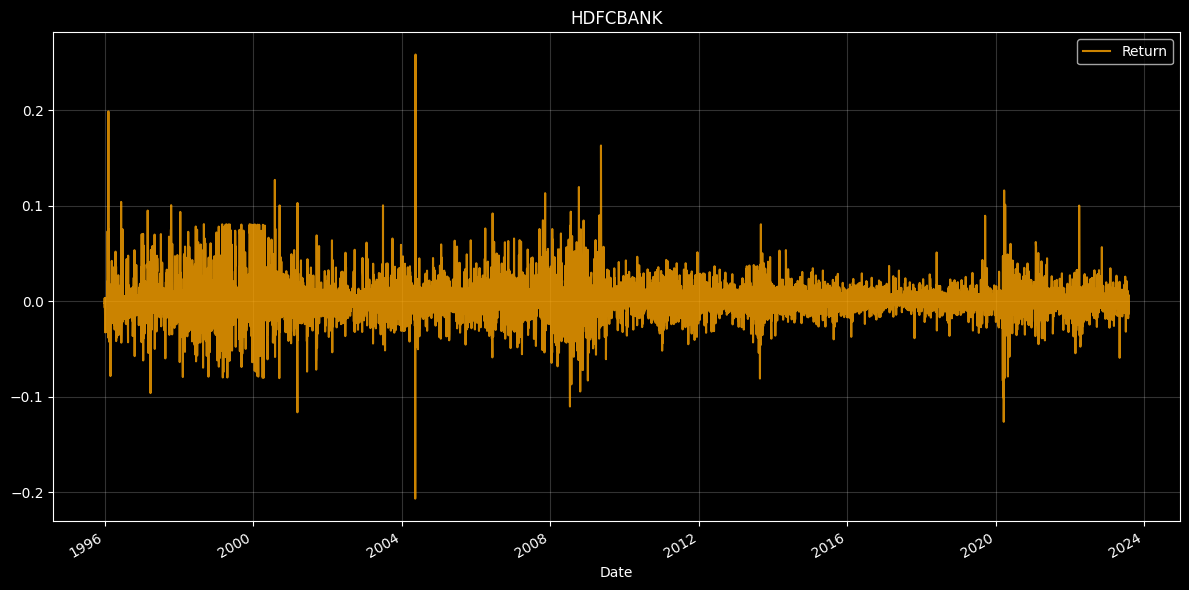

In [9]:
#return calculation
fig, ax = plt.subplots(figsize=(12, 6))
obj.Return.plot(color="orange", alpha=0.80)
ax.set_xlabel('Date')
ax.set_title('HDFCBANK')
ax.legend()
ax.grid(color='white', alpha=0.20)
plt.tight_layout()
plt.show()

In [18]:
#IncomeStatement Analysis
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

filepath = '/content/gdrive/My Drive/Colab Notebooks/HDFCBANK_INCOME STATEMENT .csv'
hdfcbank_income_statement = pd.read_csv(filepath, encoding= 'unicode_escape')
hdfcbank_income_statement.columns.values[0] = "breakdown"
hdfcbank_income_statement


Mounted at /content/gdrive


,breakdown,2022,2021,2020
0,Total Revenue,1019413700,9.366622e+08,7.917464e+08
1,Credit Losses Provision,-126979500,-1.542334e+08,-1.176219e+08
2,Non Interest Expense,373272000,3.426023e+08,3.082805e+08
3,Pretax Income,519162200,4.398265e+08,3.658440e+08
4,Tax Provision,132559200,1.138201e+08,1.054800e+08
5,Net Income Common Stockholders,386000400,3.259771e+08,2.602699e+08
6,Diluted NI Available to Com Stockholders,386000400,3.259771e+08,2.602699e+08
7,Basic EPS,-,5.927000e+01,4.759000e+01
8,Diluted EPS,-,5.902000e+01,4.727000e+01
9,Basic Average Shares,-,5.499587e+06,5.468802e+06
